In [14]:
from zs6d import ZS6D
import os
import json

with open(os.path.join("./zs6d_configs/cfg_lmo_inference_bop.json"), "r") as f:
    config = json.load(f)
    

pose_estimator = ZS6D(config['templates_gt_path'], config['norm_factor_path'])

Using cache found in /home/philipp/.cache/torch/hub/facebookresearch_dino_main
100%|██████████| 13/13 [00:27<00:00,  2.09s/it]


Preparing templates and loading of extractor is done!


running k-means on cuda..


[running kmeans]: 1it [00:00, 150.56it/s, center_shift=0.000000, iteration=1, tol=0.000100]


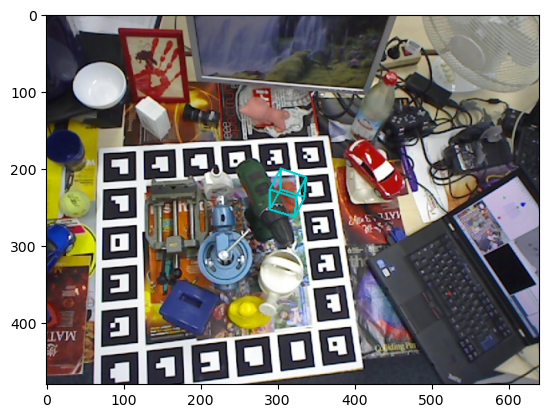

Pose estimation time: 0.2612755298614502
R_est: [[ 0.93644718  0.34912871  0.03429027]
 [ 0.29793471 -0.73989284 -0.60315296]
 [-0.18520689  0.57503716 -0.79688812]]
t_est: [ -24.77813553  -20.3746542  1235.27508073]
running k-means on cuda..


[running kmeans]: 4it [00:00, 54.11it/s, center_shift=0.000000, iteration=4, tol=0.000100]


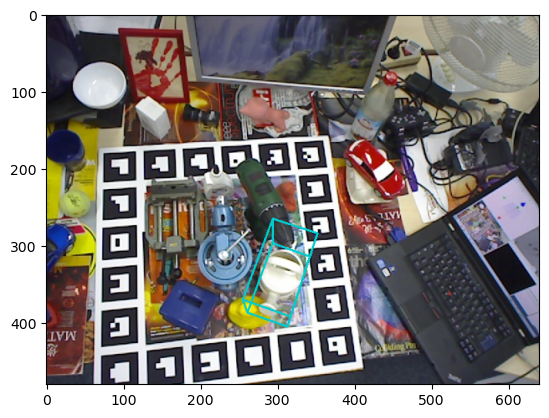

Pose estimation time: 0.5032901763916016
R_est: [[ 0.94868554  0.31141515  0.05492127]
 [ 0.30919039 -0.87707571 -0.36761326]
 [-0.06631023  0.36573051 -0.92835561]]
t_est: [ -36.48934944  169.3228146  1000.92337048]
running k-means on cuda..


[running kmeans]: 3it [00:00, 88.58it/s, center_shift=0.000000, iteration=3, tol=0.000100]


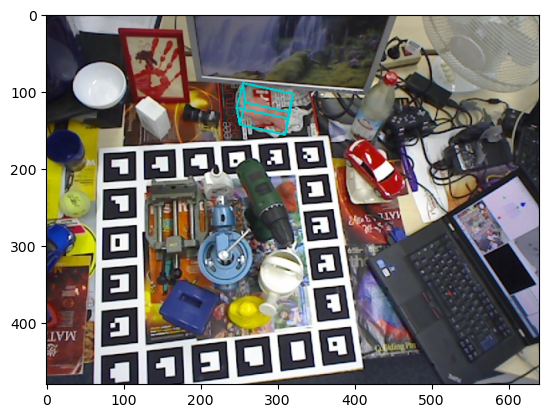

Pose estimation time: 0.34370899200439453
R_est: [[ 0.20188313 -0.97680402  0.07139406]
 [-0.95833447 -0.21205409 -0.1913847 ]
 [ 0.20208475 -0.02978204 -0.97891511]]
t_est: [ -82.96827149 -238.19816601 1161.5751813 ]
running k-means on cuda..


[running kmeans]: 6it [00:00, 54.57it/s, center_shift=0.000000, iteration=6, tol=0.000100]


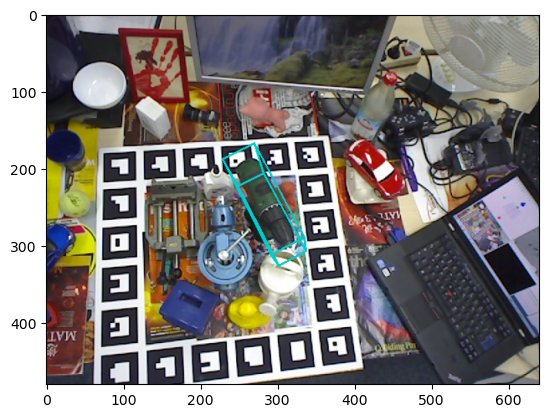

Pose estimation time: 0.5664079189300537
R_est: [[ 0.4685375   0.88296377 -0.02911345]
 [ 0.85328034 -0.4608322  -0.24402121]
 [-0.2288783   0.08949116 -0.96933279]]
t_est: [ -67.3702764    18.39491114 1015.40601905]
running k-means on cuda..


[running kmeans]: 2it [00:00, 89.79it/s, center_shift=0.000000, iteration=2, tol=0.000100]


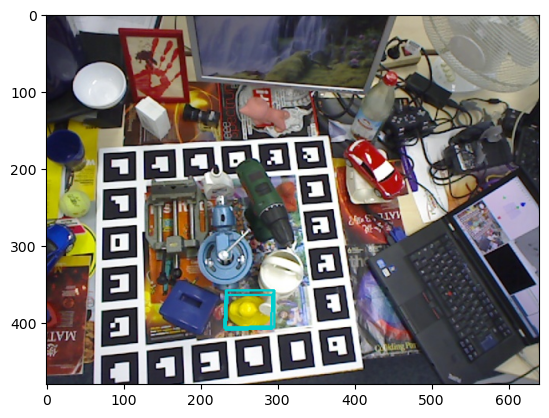

Pose estimation time: 0.2983865737915039
R_est: [[-0.99319294  0.01613955  0.11535724]
 [-0.02188525  0.94686008 -0.32090034]
 [-0.11440636 -0.32124057 -0.94006153]]
t_est: [-105.1015556   244.21818822  985.27670487]
running k-means on cuda..


[running kmeans]: 4it [00:00, 83.86it/s, center_shift=0.000000, iteration=4, tol=0.000100]


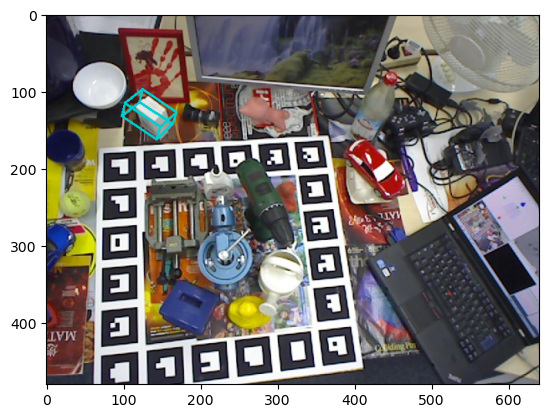

Pose estimation time: 0.31537342071533203
R_est: [[-0.82774955 -0.35436289  0.43503751]
 [-0.55325673  0.64462804 -0.52759993]
 [-0.09347554 -0.67740803 -0.72964422]]
t_est: [-550.74920014 -323.03908742 1652.7840662 ]
running k-means on cuda..


[running kmeans]: 2it [00:00, 89.29it/s, center_shift=0.000000, iteration=2, tol=0.000100]


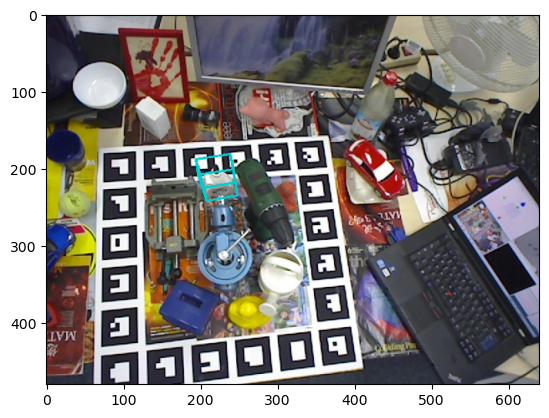

Pose estimation time: 0.2604556083679199
R_est: [[ 0.2073673   0.97490374  0.08100306]
 [ 0.92886104 -0.17023835 -0.32899253]
 [-0.30694622  0.14346288 -0.94085197]]
t_est: [-187.39423572  -51.30116859 1050.69369341]
running k-means on cuda..


[running kmeans]: 5it [00:00, 58.27it/s, center_shift=0.000000, iteration=5, tol=0.000100]


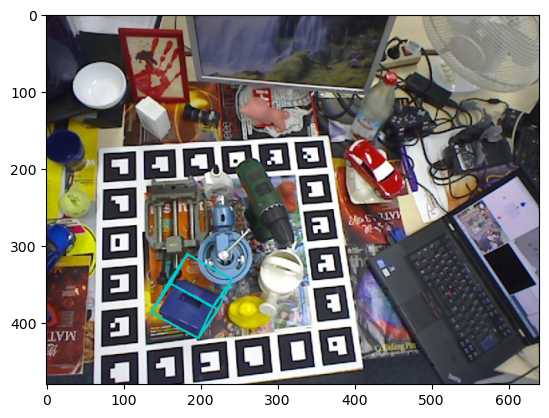

Pose estimation time: 0.49029064178466797
R_est: [[-0.49863119  0.84812272 -0.17903851]
 [ 0.69819165  0.51537931  0.49690301]
 [ 0.51370747  0.12276814 -0.84913639]]
t_est: [-217.12143579  198.02700707  920.361259  ]


In [15]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt

with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '8'


for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_name = data_gt[img_id][obj_number]['obj_name']
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = os.path.join(config['dataset_path'], data_gt[img_id][obj_number]['img_name'].split("./")[-1])
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()

    R_est, t_est = pose_estimator.get_pose(img, obj_name, obj_id, mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")




In [1]:
import trimesh
from tools.ply_file_to_3d_coord_model import convert_unique


mesh_path = "/mnt/Littleboy/ZS6D/templates/linemod_desc/models/obj_000001.ply"

out_path = "obj_000001_xyz.ply"

convert_unique(mesh_path, out_path)


(39.819958, 40.709934, 56.63465, -1.8856587, -1.9103358, -10.750154)

In [18]:
from plyfile import PlyData, PlyElement

model_path = '/mnt/Littleboy/ZS6D/templates/ycbv_desc/models_xyz/obj_000010.ply'

model_path_working = '/mnt/Littleboy/ZS6D/templates/ycbv_desc/models_xyz_working/obj_000010.ply'

model_path_before = '/mnt/Littleboy/ZS6D/templates/ycbv/models/obj_000010.ply'

plydata_before = PlyData.read(model_path_before)

plydata_not_working = PlyData.read(model_path)

plydata_working = PlyData.read(model_path_working)

In [19]:
plydata_before.elements[0].data

array([(-47.551, -60.295,   5.166, -5.22226  , -1.919974 ,  2.89706 , 0.896 , 0.1008),
       (-49.817,  -5.815,  -8.504, -5.452106 ,  0.9285001, -2.978487, 0.1156, 0.6888),
       (-30.09 , -85.954, -12.587, -0.1040842, -3.365586 , -4.786951, 0.3977, 0.8282),
       ...,
       (  9.81 ,  80.452,  11.273,  0.4151828,  0.9106925,  2.366138, 0.5008, 0.6881),
       (  7.996,  84.863,   9.165, -0.1622982,  2.499315 ,  2.925677, 0.4943, 0.7013),
       ( 10.651,  83.125,  10.057,  0.4254326,  0.7842768,  1.947044, 0.6062, 0.5532)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('nx', '<f4'), ('ny', '<f4'), ('nz', '<f4'), ('texture_u', '<f4'), ('texture_v', '<f4')])

In [20]:
plydata_working.elements[0].data

memmap([(-47.551, -60.295,   5.166,  71,  36, 167, 255),
        (-49.817,  -5.815,  -8.504,  67, 104,  77, 255),
        (-30.09 , -85.954, -12.587, 103,   4,  50, 255), ...,
        (  9.81 ,  80.452,  11.273, 174, 212, 208, 255),
        (  7.996,  84.863,   9.165, 171, 218, 194, 255),
        ( 10.651,  83.125,  10.057, 176, 216, 200, 255)],
       dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('red', 'u1'), ('green', 'u1'), ('blue', 'u1'), ('alpha', 'u1')])

In [25]:
plydata_not_working.elements[0].data

array([(-47.551, -60.295,   5.166, -5.22226  , -1.919974 ,  2.89706 , 0.896 , 0.1008),
       (-49.817,  -5.815,  -8.504, -5.452106 ,  0.9285001, -2.978487, 0.1156, 0.6888),
       (-30.09 , -85.954, -12.587, -0.1040842, -3.365586 , -4.786951, 0.3977, 0.8282),
       ...,
       (  9.81 ,  80.452,  11.273,  0.4151828,  0.9106925,  2.366138, 0.5008, 0.6881),
       (  7.996,  84.863,   9.165, -0.1622982,  2.499315 ,  2.925677, 0.4943, 0.7013),
       ( 10.651,  83.125,  10.057,  0.4254326,  0.7842768,  1.947044, 0.6062, 0.5532)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('nx', '<f4'), ('ny', '<f4'), ('nz', '<f4'), ('texture_u', '<f4'), ('texture_v', '<f4')])

In [2]:
mesh = trimesh.load(out_path)

mesh.show()